In [1]:
""" IMPORT ALL DEPENDENCIES"""


# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline
# import color maps
from matplotlib.colors import ListedColormap

# Seaborn for easier visualization
import seaborn as sns

In [2]:
df = pd.read_csv("fer2013.csv")
df.head()

emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training

In [3]:
df

emotion                                             pixels        Usage
0            0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...     Training
1            0  151 150 147 155 148 133 111 140 170 174 182 15...     Training
2            2  231 212 156 164 174 138 161 173 182 200 106 38...     Training
3            4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...     Training
4            6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...     Training
...        ...                                                ...          ...
35882        6  50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...  PrivateTest
35883        3  178 174 172 173 181 188 191 194 196 199 200 20...  PrivateTest
35884        0  17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...  PrivateTest
35885        3  30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...  PrivateTest
35886        2  19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...  PrivateTest

[35887 rows x 3 columns]

In [4]:
df.shape

(35887, 3)

## **Plotting emotion**

<Axes: xlabel='emotion', ylabel='count'>

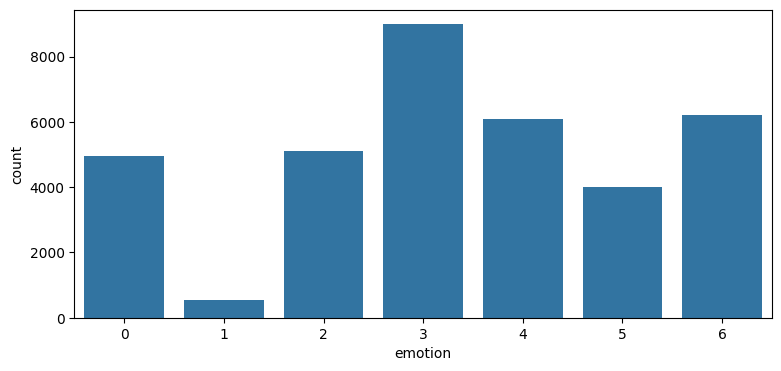

In [5]:
""" matplotlib => to define size , sns => to use counterplot """

plt.figure(figsize=(9,4))
sns.countplot(x='emotion', data=df)

In [6]:
df['emotion'].value_counts()

emotion
3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: count, dtype: int64

* where ** 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral**

### Observation
* for Digust we have about 547 images only very less.

## **Plotting Usage**

<Axes: xlabel='Usage', ylabel='count'>

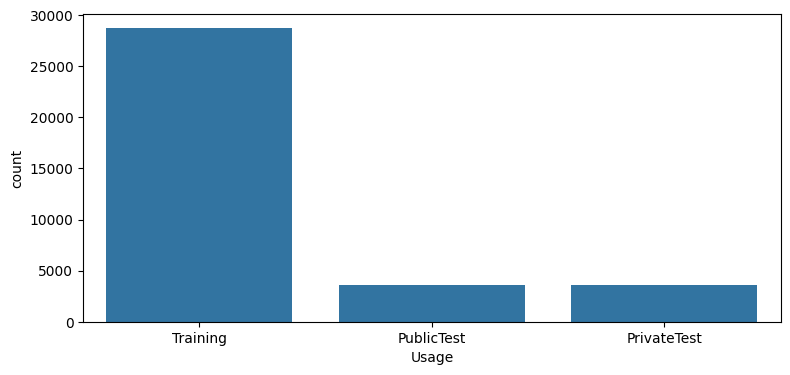

In [7]:
plt.figure(figsize=(9,4))
sns.countplot(x='Usage', data=df)

In [8]:
df['Usage'].value_counts()

Usage
Training       28709
PublicTest      3589
PrivateTest     3589
Name: count, dtype: int64

# PreProcessing

In [9]:
import cv2
image_size=(48,48)

In [10]:
pixels = df['pixels'].tolist() # Converting the relevant column element into a list for each row
width, height = 48, 48
faces = []

for pixel_sequence in pixels:
  face = [int(pixel) for pixel in pixel_sequence.split(' ')] # Splitting the string by space character as a list
  face = np.asarray(face).reshape(width, height) #converting the list to numpy array in size of 48*48
  face = cv2.resize(face.astype('uint8'),image_size) #resize the image to have 48 cols (width) and 48 rows (height)
  faces.append(face.astype('float32')) #makes the list of each images of 48*48 and their pixels in numpyarray form

faces = np.asarray(faces) #converting the list into numpy array
faces = np.expand_dims(faces, -1) #Expand the shape of an array -1=last dimension => means color space
emotions = pd.get_dummies(df['emotion']).to_numpy() #doing the one hot encoding type on emotions

In [11]:
print(faces[0]) #Pixels after preprocessing

[[[ 70.]
  [ 80.]
  [ 82.]
  ...
  [ 52.]
  [ 43.]
  [ 41.]]

 [[ 65.]
  [ 61.]
  [ 58.]
  ...
  [ 56.]
  [ 52.]
  [ 44.]]

 [[ 50.]
  [ 43.]
  [ 54.]
  ...
  [ 49.]
  [ 56.]
  [ 47.]]

 ...

 [[ 91.]
  [ 65.]
  [ 42.]
  ...
  [ 72.]
  [ 56.]
  [ 43.]]

 [[ 77.]
  [ 82.]
  [ 79.]
  ...
  [105.]
  [ 70.]
  [ 46.]]

 [[ 77.]
  [ 72.]
  [ 84.]
  ...
  [106.]
  [109.]
  [ 82.]]]


In [12]:
print(faces.shape)
print(faces[0].ndim)
print(type(faces))

(35887, 48, 48, 1)
3
<class 'numpy.ndarray'>


In [13]:
print(emotions[0]) #Emotion after preprocessing

[ True False False False False False False]


In [14]:
print(emotions.shape)
print(emotions.ndim)
print(type(emotions))

(35887, 7)
2
<class 'numpy.ndarray'>


# Splitting the dataset

## Scaling the pixels between -1 and 1

In [15]:
x = faces.astype('float32')
x = x / 255.0 #Dividing the pixels by 255 for normalization  => range(0,1)

# Scaling the pixels value in range(-1,1)
x = x - 0.5
x = x * 2.0

In [16]:
print(x[0])

[[[-0.45098037]
  [-0.372549  ]
  [-0.35686272]
  ...
  [-0.5921569 ]
  [-0.6627451 ]
  [-0.6784314 ]]

 [[-0.49019605]
  [-0.52156866]
  [-0.54509807]
  ...
  [-0.56078434]
  [-0.5921569 ]
  [-0.654902  ]]

 [[-0.60784316]
  [-0.6627451 ]
  [-0.5764706 ]
  ...
  [-0.6156863 ]
  [-0.56078434]
  [-0.6313726 ]]

 ...

 [[-0.2862745 ]
  [-0.49019605]
  [-0.67058825]
  ...
  [-0.4352941 ]
  [-0.56078434]
  [-0.6627451 ]]

 [[-0.3960784 ]
  [-0.35686272]
  [-0.38039213]
  ...
  [-0.17647058]
  [-0.45098037]
  [-0.6392157 ]]

 [[-0.3960784 ]
  [-0.4352941 ]
  [-0.34117645]
  ...
  [-0.16862744]
  [-0.14509803]
  [-0.35686272]]]


In [17]:
type(x)

numpy.ndarray

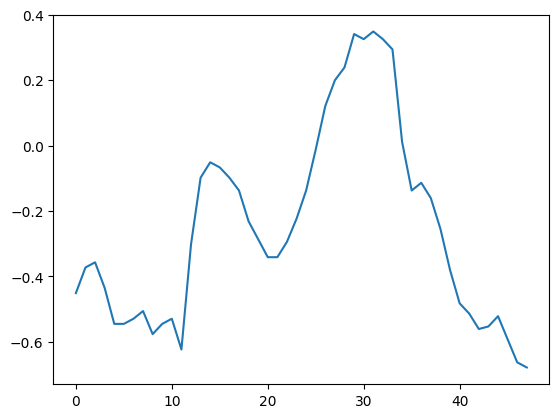

In [18]:
plt.plot(x[0,0])
plt.show()

In [19]:
print(x.min(),x.max()) # we can observe that pixels are scale

-1.0 1.0


## Splitting the dataset into train & validation set

In [20]:
num_samples, num_classes = emotions.shape

num_samples = len(x)
num_train_samples = int((1 - 0.2)*num_samples)

# Traning data
train_x = x[:num_train_samples]
train_y = emotions[:num_train_samples]

# Validation data
val_x = x[num_train_samples:]
val_y = emotions[num_train_samples:]

train_data = (train_x, train_y)
val_data = (val_x, val_y)

In [21]:
print('Training Pixels',train_x.shape)  # ==> 4 dims -  no of images , width , height , color
print('Training labels',train_y.shape)

print('Validation Pixels',val_x.shape)
print('Validation labels',val_y.shape)

Training Pixels (28709, 48, 48, 1)
Training labels (28709, 7)
Validation Pixels (7178, 48, 48, 1)
Validation labels (7178, 7)


# Defining Model

In [22]:
#load the libaray to built the model
from keras.layers import Activation, Convolution2D, Dropout, Conv2D
from keras.layers import AveragePooling2D, BatchNormalization
from keras.layers import GlobalAveragePooling2D
from keras.models import Sequential
from keras.layers import Flatten
from keras.models import Model
from keras.layers import Input
from keras.layers import MaxPooling2D
from keras.layers import SeparableConv2D
from keras import layers
from keras.regularizers import l2

In [23]:
"""
* keras.__version__
* pip install --upgrade keras
"""

'\n* keras.__version__\n* pip install --upgrade keras\n'

# 1) Simpler CNN

In [24]:
input_shape=(48, 48, 1)
num_classes = 7

In [25]:
""" Building up Model Architecture """

model = Sequential()
model.add(Convolution2D(filters=16, kernel_size=(7, 7), padding='same',
                            name='image_array', input_shape=input_shape))
model.add(BatchNormalization())
model.add(Convolution2D(filters=16, kernel_size=(7, 7), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Convolution2D(filters=32, kernel_size=(5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=32, kernel_size=(5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Convolution2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Convolution2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Convolution2D(filters=256, kernel_size=(3, 3), padding='same'))



model.add(BatchNormalization())
model.add(Convolution2D(filters=num_classes, kernel_size=(3, 3), padding='same'))
model.add(GlobalAveragePooling2D())
model.add(Activation('softmax',name='predictions'))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ image_array (Conv2D)                 │ (None, 48, 48, 16)          │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 48, 48, 16)          │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 48, 48, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 48, 48, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 24, 24, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 32)          │          12,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 24, 24, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 24, 24, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 12, 12, 32)          │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 12, 12, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 12, 12, 64)          │             256 │
│ (BatchNormalization)                 │                             │              

 Total params: 642,935 (2.45 MB)

 Trainable params: 641,463 (2.45 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [27]:
# parameters
batch_size = 32 #Number of samples per gradient update
num_epochs = 200 # Number of epochs to train the model.
#input_shape = (64, 64, 1)
verbose = 1 #per epohs  progress bar
num_classes = 7
patience = 50
base_path = 'drive/Colab Notebooks/emotion/simplecnn/'

In [29]:
from keras.callbacks import CSVLogger, ModelCheckpoint, EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Data Augmenttion

In [30]:
""" Data Augmentation => taking the batch and apply some series of random transformations (random rotation, resizing, shearing)

      ===> to increase generalizability of model  """


# data generator Generate batches of tensor image data with real-time data augmentation
data_generator = ImageDataGenerator(
                        featurewise_center=False,
                        featurewise_std_normalization=False,
                        rotation_range=10,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=.1,
                        horizontal_flip=True)

In [31]:
# model parameters/compilation

""" CONFIGURATION ==>.compile(optimizer, loss , metrics) """



model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ image_array (Conv2D)                 │ (None, 48, 48, 16)          │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 48, 48, 16)          │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 48, 48, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 48, 48, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 24, 24, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 32)          │          12,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 24, 24, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 24, 24, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 12, 12, 32)          │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 12, 12, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 12, 12, 64)          │             256 │
│ (BatchNormalization)                 │                             │              

 Total params: 642,935 (2.45 MB)

 Trainable params: 641,463 (2.45 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [38]:
import os
datasets = ['fer2013']
num_epochs = 30
base_path="/content"
for dataset_name in datasets:
    print('Training dataset:', dataset_name)

    #callbacks
    log_file_path = dataset_name + '_emotion_training.log'

    csv_logger = CSVLogger(log_file_path, append=False)
    early_stop = EarlyStopping('val_loss', patience=patience)
    reduce_lr = ReduceLROnPlateau('val_loss', factor=0.1,patience=int(patience/4), verbose=1)

    trained_models_path = os.path.join(base_path, dataset_name + '_simple_cnn')
    model_names = trained_models_path + '.{epoch:02d}-{val_loss:.2f}.keras'  # Change file extension to .keras

    model_checkpoint = ModelCheckpoint(model_names, monitor='val_loss', verbose=1, save_best_only=True)

    my_callbacks = [model_checkpoint, csv_logger, early_stop, reduce_lr]

    # loading dataset
    train_faces, train_emotions = train_data
    history = model.fit(data_generator.flow(train_faces, train_emotions,
                                        batch_size=batch_size),
                    epochs=num_epochs, verbose=1,
                    callbacks=my_callbacks, validation_data=val_data)


Training dataset: fer2013
Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


896/898 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2574 - loss: 1.8462
Epoch 1: val_loss improved from inf to 1.63980, saving model to /content/fer2013_simple_cnn.01-1.64.keras
898/898 ━━━━━━━━━━━━━━━━━━━━ 47s 33ms/step - accuracy: 0.2575 - loss: 1.8459 - val_accuracy: 0.3558 - val_loss: 1.6398 - learning_rate: 0.0010
Epoch 2/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3452 - loss: 1.6625
Epoch 2: val_loss improved from 1.63980 to 1.50775, saving model to /content/fer2013_simple_cnn.02-1.51.keras
898/898 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.3452 - loss: 1.6625 - val_accuracy: 0.4117 - val_loss: 1.5078 - learning_rate: 0.0010
Epoch 3/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3707 - loss: 1.6084
Epoch 3: val_loss did not improve from 1.50775
898/898 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.3707 - loss: 1.6084 - val_accuracy: 0.4241 - val_loss: 1.5173 - learning_rate: 0.0010
Epoch 4/30
897/898 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - acc

In [39]:
#evaluate() returns [loss,acc]
score = model.evaluate(val_x, val_y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)


225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5650 - loss: 1.1595
Test loss: 1.1482750177383423
Test accuracy: 56.255221366882324


In [40]:
""" metrics collected by history object """
history_dict=history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])

In [41]:
print(history_dict["accuracy"])

[0.29179003834724426, 0.3534083366394043, 0.38169214129447937, 0.4044376313686371, 0.42192342877388, 0.43592602014541626, 0.44846564531326294, 0.45692989230155945, 0.4596119821071625, 0.46403566002845764, 0.477829247713089, 0.4847608804702759, 0.48054617643356323, 0.4865373373031616, 0.4904037117958069, 0.4905778765678406, 0.4954892098903656, 0.4968128502368927, 0.500853419303894, 0.5045456290245056, 0.5008185505867004, 0.5065310597419739, 0.5056602358818054, 0.509352445602417, 0.5083075165748596, 0.5109199285507202, 0.513915479183197, 0.5161099433898926, 0.5143682956695557, 0.515378475189209]


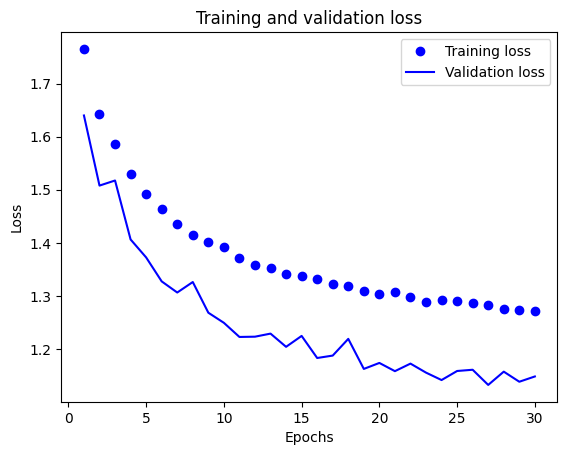

In [42]:
""" Visualising model training history """

import matplotlib.pyplot as plt

train_loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, train_loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

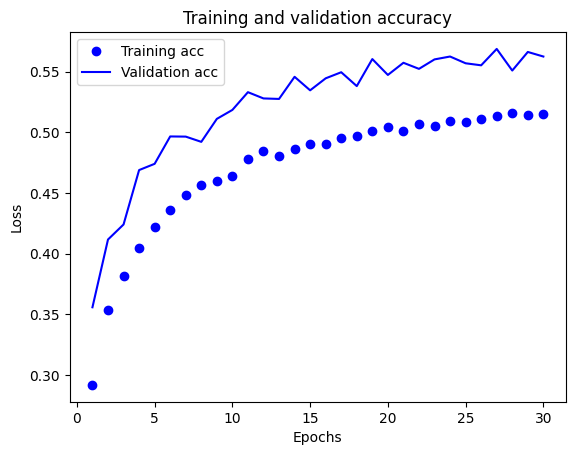

In [43]:
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Testing the model on  some images

In [44]:
 emotion_dict = {0: "Neutral", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Sad", 5: "Surprised", 6: "Neutral"}

  #emojis unicodes #
 emojis = { 0:"\U0001f620",1:"\U0001f922" ,2:"\U0001f628" ,3:"\U0001f60A" , 4:"\U0001f625" ,5:"\U0001f632",6:"\U0001f610" }

In [45]:
print(emojis.values(),sep=" ")

dict_values(['😠', '🤢', '😨', '😊', '😥', '😲', '😐'])


In [46]:
!cd content
!pwd
!ls

/bin/bash: line 1: cd: content: No such file or directory
/content
fer2013.csv			  fer2013_simple_cnn.11-1.22.keras
fer2013_emotion_training.log	  fer2013_simple_cnn.14-1.20.keras
fer2013_simple_cnn.01-1.64.keras  fer2013_simple_cnn.16-1.18.keras
fer2013_simple_cnn.02-1.51.keras  fer2013_simple_cnn.19-1.16.keras
fer2013_simple_cnn.04-1.41.keras  fer2013_simple_cnn.21-1.16.keras
fer2013_simple_cnn.05-1.37.keras  fer2013_simple_cnn.23-1.16.keras
fer2013_simple_cnn.06-1.33.keras  fer2013_simple_cnn.24-1.14.keras
fer2013_simple_cnn.07-1.31.keras  fer2013_simple_cnn.27-1.13.keras
fer2013_simple_cnn.09-1.27.keras  sample_data
fer2013_simple_cnn.10-1.25.keras


In [50]:
from google.colab.patches import cv2_imshow
import cv2

def _predict(path):
  facecasc = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
  imagePath = '/content/'+path
  image = cv2.imread(imagePath)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  faces = facecasc.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=10)
  print("No of faces : ",len(faces))
  i = 1
  for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    roi_gray = gray[y:y + h, x:x + w]                      #croping
    cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
    prediction = model.predict(cropped_img)

    maxindex = int(np.argmax(prediction))
    print("person ",i," : ",emotion_dict[maxindex], "-->",emojis[maxindex])
    cv2.putText(image, emotion_dict[maxindex], (x+10, y-20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
                                              #if text is not apeared , change coordinates. it may work

  cv2_imshow(image)

No of faces :  0


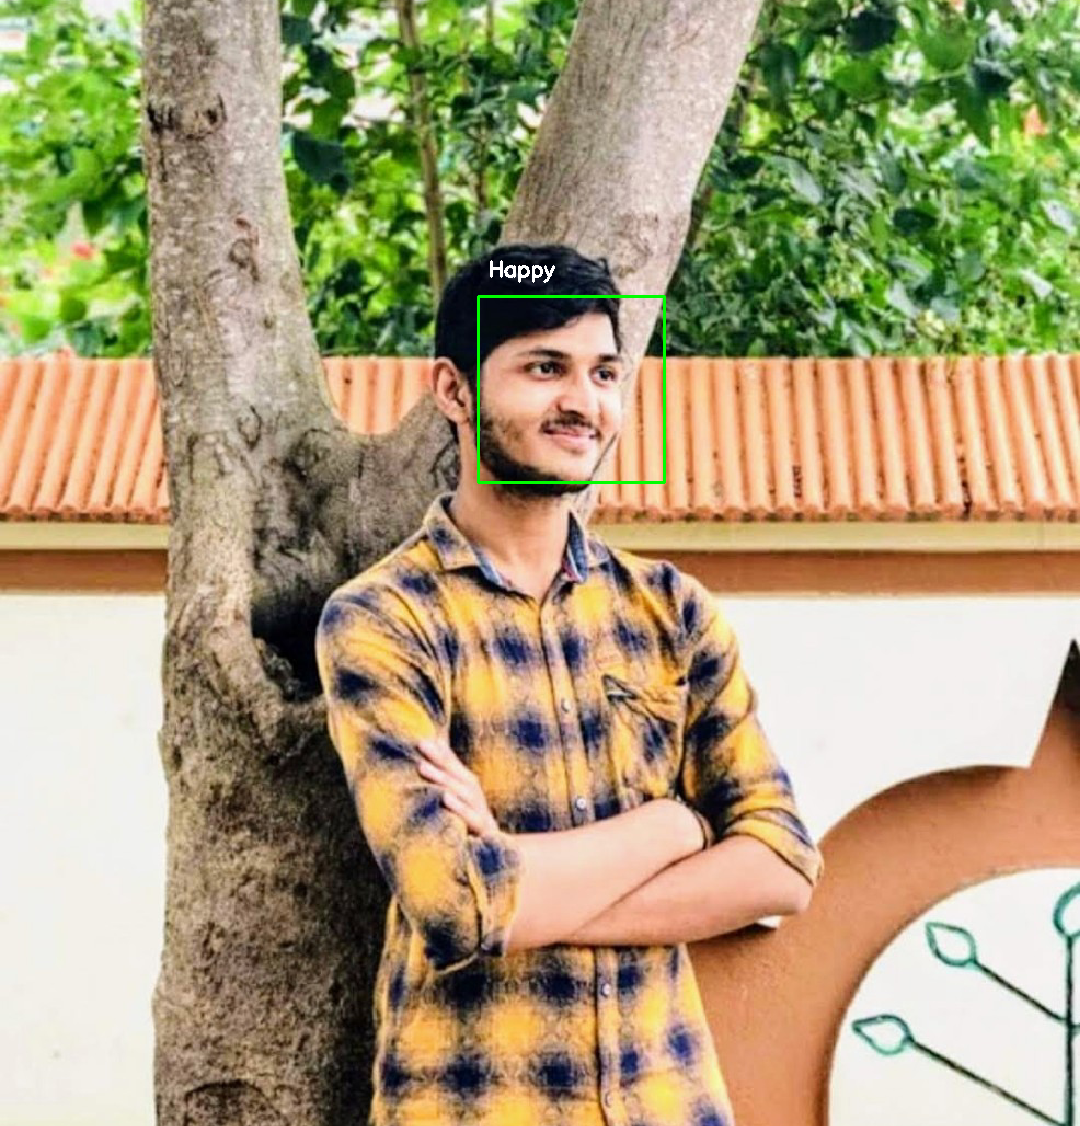

In [51]:
_predict("me.png")

No of faces :  1
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
person  1  :  Neutral --> 😠


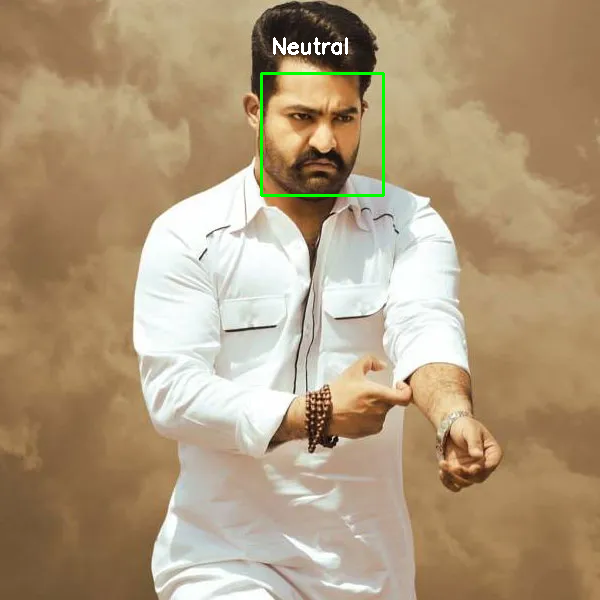

In [52]:
_predict("ntr.jpg")

No of faces :  1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
person  1  :  Happy --> 😊


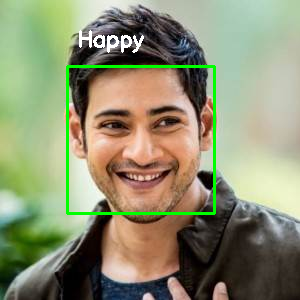

In [54]:
_predict("mb.jpg")

No of faces :  3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
person  1  :  Neutral --> 😐
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
person  1  :  Neutral --> 😐
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
person  1  :  Neutral --> 😠


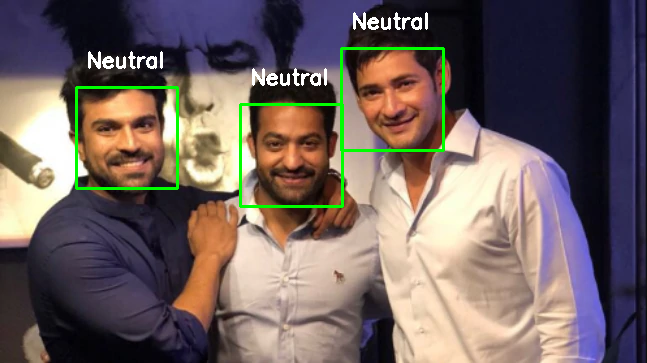

In [55]:
_predict("Ram_Charan.webp")

No of faces :  2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
person  1  :  Neutral --> 😐
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
person  1  :  Neutral --> 😐


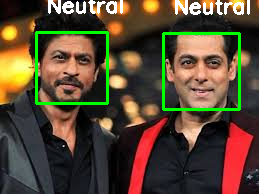

In [56]:
_predict("khans.jpg")

No of faces :  1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
person  1  :  Neutral --> 😐


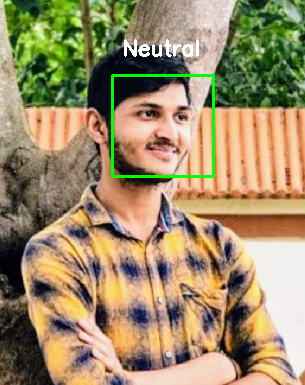

In [57]:
_predict("me3.PNG")

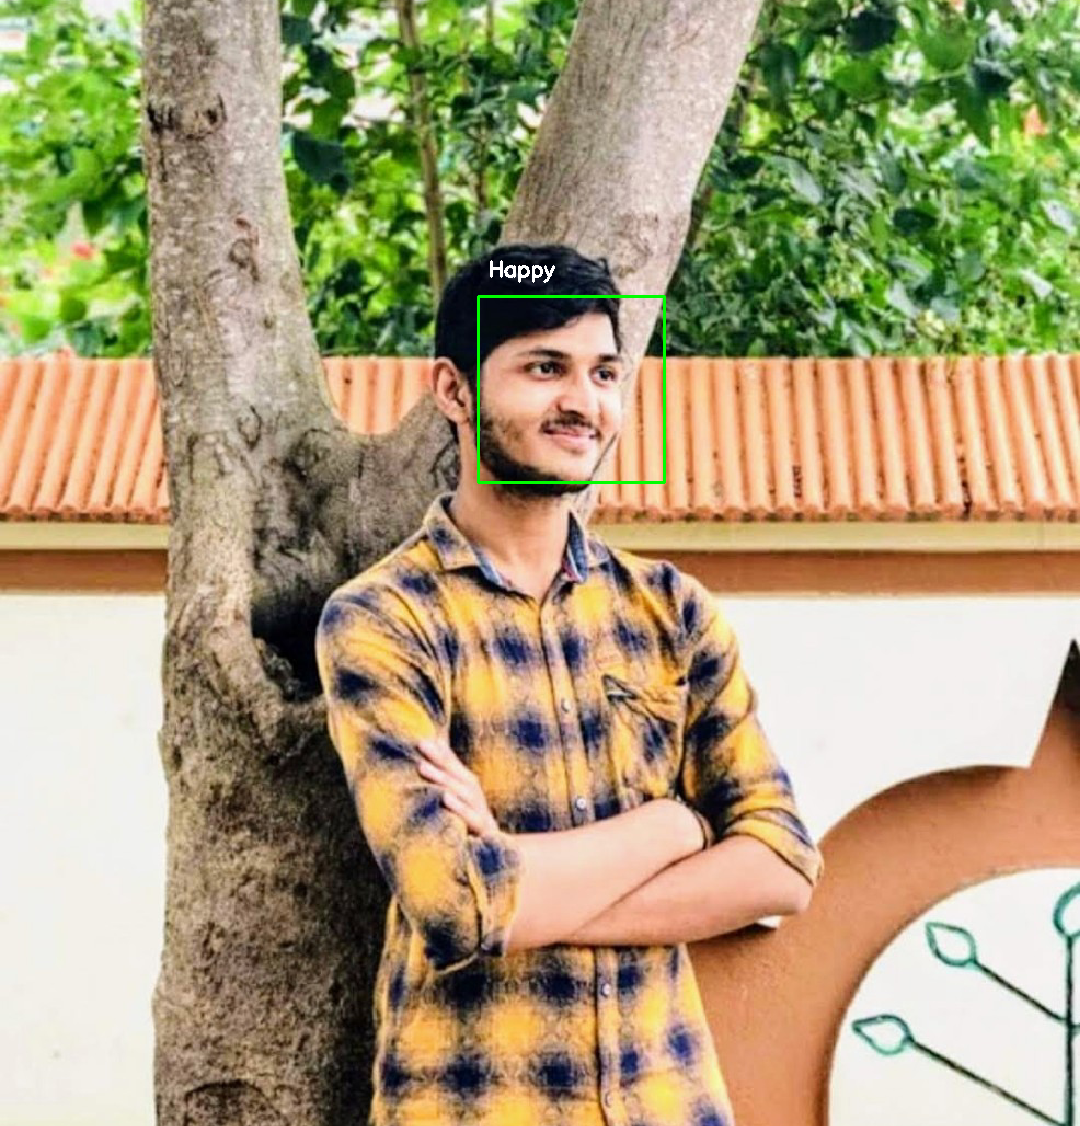

In [58]:
""" code snippet to display image """

from IPython.display import Image
Image('/content/me.png')

* **saving the weights of the model and again loading it in keras**
* **saving the architecture of the model in json file using model_from_json**

In [61]:
model.save_weights("model.weights.h5") # Change the filename to end with .weights.h5

In [63]:
model.load_weights("model.weights.h5")

In [64]:
from keras.models import model_from_json

In [67]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
#model.save_weights("model.h5")
print("Saved model to disk")

# later...

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("model.h5")

Saved model to disk


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
""" code snippet for Downloading files from colabs """

from google.colab import files
files.download("model.h5")
files.download("model.json")

In [68]:
""" loading the model in modular approach """

def load_model_():
  json_file = open('model.json', 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  model = model_from_json(loaded_model_json)
  # load weights into new model
  model.load_weights("model.weights.h5")
  return model


model = load_model_()

In [69]:
model2 = load_model_()